Batas Biaya Mahal (Median): 9382.03
--- Contoh Data dengan Label Baru (is_expensive) ---
   age     bmi smoker  is_expensive
0   19  27.900    yes             1
1   18  33.770     no             0
2   28  33.000     no             0
3   33  22.705     no             1
4   32  28.880     no             0


=== Hasil Klasifikasi KNN (k=5) ===
Akurasi Model: 0.9029850746268657

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       146
           1       0.88      0.92      0.90       122

    accuracy                           0.90       268
   macro avg       0.90      0.90      0.90       268
weighted avg       0.90      0.90      0.90       268



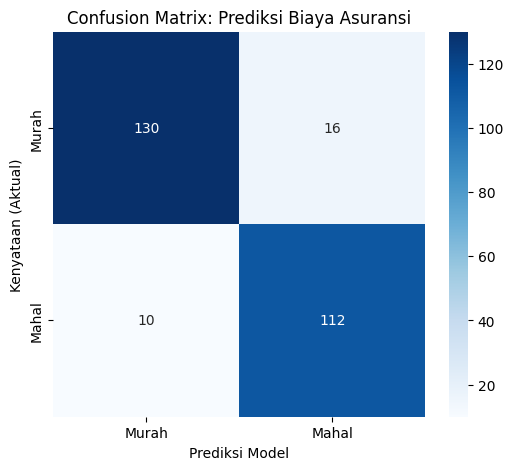


Grafik Error Rate ditampilkan untuk membantu memilih K terbaik.


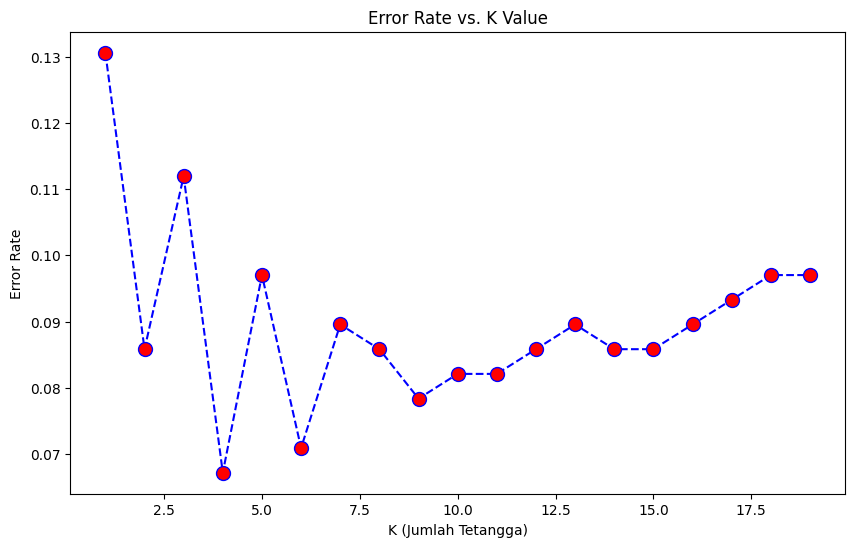

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


df = pd.read_csv('insurance.csv')


median_charge = df['charges'].median()
df['is_expensive'] = (df['charges'] > median_charge).astype(int)


df_class = df.drop('charges', axis=1)

print(f"Batas Biaya Mahal (Median): {median_charge:.2f}")
print("--- Contoh Data dengan Label Baru (is_expensive) ---")
print(df_class[['age', 'bmi', 'smoker', 'is_expensive']].head())
print("\n")

df_encoded = pd.get_dummies(df_class, columns=['sex', 'smoker', 'region'], drop_first=True)


X = df_encoded.drop('is_expensive', axis=1)
y = df_encoded['is_expensive']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Prediksi
y_pred = knn.predict(X_test_scaled)


print("=== Hasil Klasifikasi KNN (k=5) ===")
print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))


plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Murah', 'Mahal'], yticklabels=['Murah', 'Mahal'])
plt.xlabel('Prediksi Model')
plt.ylabel('Kenyataan (Aktual)')
plt.title('Confusion Matrix: Prediksi Biaya Asuransi')
plt.show()


error_rate = []
for i in range(1, 20):
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(X_train_scaled, y_train)
    pred_i = knn_i.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K (Jumlah Tetangga)')
plt.ylabel('Error Rate')
print("\nGrafik Error Rate ditampilkan untuk membantu memilih K terbaik.")
plt.show()